# VHR-10 COCO Dataset


---


## Dataset Source

The dataset and coco annotations are available from [chaozhong2010/VHR-10_dataset_coco](https://github.com/chaozhong2010/VHR-10_dataset_coco)

#### Citations

> [1] Su H, Wei S, Yan M, et al. Object Detection and Instance Segmentation in Remote Sensing Imagery Based on Precise Mask R-CNN[C]. IGARSS 2019-2019 IEEE International Geoscience and Remote Sensing Symposium. IEEE, 2019: 1454-1457.

> [2] Su, H.; Wei, S.; Liu, S.; Liang, J.; Wang, C.; Shi, J.; Zhang, X. HQ-ISNet: High-Quality Instance Segmentation for Remote Sensing Imagery. Remote Sens. 2020, 12, 989.

In [ ]:
!pip install numpy matplotlib scikit-image pillow tqdm pathlib gdown pycocotools
# !python -m pip install --upgrade git+https://github.com/activeloopai/Hub

## Download and extract dataset


In [7]:
!gdown https://drive.google.com/u/0/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE -O /tmp/dataset.rar

print('Extracting rar')
!unrar x /tmp/dataset.rar /tmp/

DATASET_ROOT = '/tmp/dataset'

print("Renaming directory to remove spaces")
!mv "/tmp/NWPU VHR-10 dataset" /tmp/dataset
!mv '/tmp/dataset/ground truth' /tmp/dataset/ground_truth
!mv '/tmp/dataset/positive image set' /tmp/dataset/positive_image_set
!mv '/tmp/dataset/negative image set' /tmp/dataset/negative_image_set

print('Downloading Annotations')
!wget https://github.com/chaozhong2010/VHR-10_dataset_coco/blob/master/NWPU%20VHR-10_dataset_coco/annotations.json?raw=true -O /tmp/dataset/annotations.json

!ls -lh /tmp/dataset/

Downloading...
From: https://drive.google.com/u/0/uc?id=1--foZ3dV5OCsqXQXT84UeKtrAqc5CkAE
To: /tmp/dataset.rar
76.8MB [00:34, 2.22MB/s]
Extracting rar

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /tmp/dataset.rar

Creating    /tmp/NWPU VHR-10 dataset                                  OK
Creating    /tmp/NWPU VHR-10 dataset/ground truth                     OK
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/001.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/002.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/003.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/004.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/005.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/006.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/ground truth/007.txt                0  OK 
Extracting  /tmp/NWPU VHR-10 dataset/gro

### Load COCO **Annotation**

In [8]:
import os
from pycocotools.coco import COCO
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import cv2

import random
%matplotlib inline

ANNOT_FILE = os.path.join(DATASET_ROOT, 'annotations.json')
IMG_ROOT = os.path.join(DATASET_ROOT, 'positive_image_set')

coco = COCO(ANNOT_FILE)

# display categories and supercategories
cats = coco.loadCats(coco.getCatIds())
cat_names=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(cat_names)))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
COCO categories: 
airplane ship storage_tank baseball_diamond tennis_court basketball_court ground_track_field harbor bridge vehicle



### Display bbox and segmentation using coco's function

/home/haritsahm/.virtualenvs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


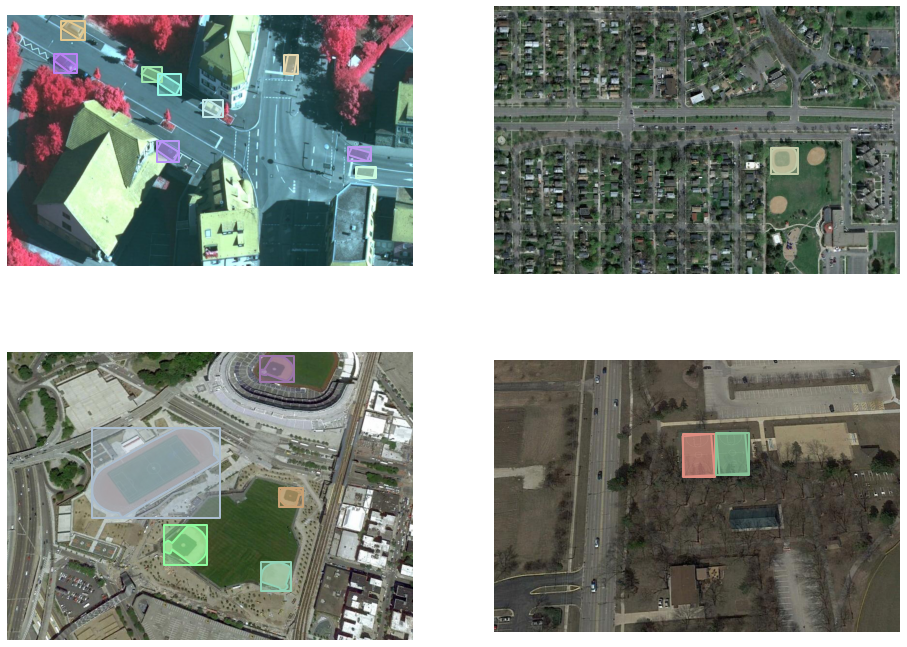

In [9]:
# Get annotations display from coco.py
def showAnns(anns, draw_bbox=False):
    """
    Display the specified annotations.
    :param anns (array of object): annotations to display
    :return: None
    """
    if len(anns) == 0:
        return 0
    if 'segmentation' in anns[0] or 'keypoints' in anns[0]:
        datasetType = 'instances'
    else:
        raise Exception('datasetType not supported')
    if datasetType == 'instances':
        polygons = []
        color = []
        for ann in anns:
            c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
            if 'segmentation' in ann:
                if type(ann['segmentation']) == list:
                    # polygon
                    for seg in ann['segmentation']:
                        poly = np.array(seg).reshape((int(len(seg)/2), 2))
                        polygons.append(Polygon(poly))
                        color.append(c)
            if draw_bbox:
                [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
                poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
                np_poly = np.array(poly).reshape((4,2))
                polygons.append(Polygon(np_poly))
                color.append(c)

        mask_p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
        edge_p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
        return mask_p, edge_p

random_ids = random.sample(coco.getImgIds(), 4)
ann_examples = coco.loadAnns(ids=coco.getAnnIds(imgIds=1))
fig = plt.figure(figsize=(8, 6))
for n,img_id in enumerate(random_ids):
  anns = coco.loadAnns(ids=coco.getAnnIds(imgIds=img_id))
  imgdata = coco.loadImgs(ids=img_id)[0]
  img = io.imread(os.path.join(IMG_ROOT, imgdata['file_name']))
  a = fig.add_subplot(2, np.ceil(len(random_ids)/float(2)), n + 1)

  mask_p, edge_p = showAnns(anns, draw_bbox=True)
  a.add_collection(mask_p)
  a.add_collection(edge_p)
  plt.axis('off')
  plt.imshow(img)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(random_ids)/2)
plt.show()

## Define Dataset's Schema

Similar to coco_train's scheme, each data will have a schema structure of:



1. **image**: *image array*
2. **image_filename**: *filename* stored
3. **image_id**: *image_id*
4. **segmentation_vis**: *image array to visualize segmentation*
5. **objects**: *list of object annotations in the image*
  * **id**: *id*
  * **category_id**: *cat_id*
  * **area**: *area*
  * **bbox**: *bbox*
  * **segmentation**: *instance segmentation array*
  * **is_crowd**: *crowd*
  * **polygon**: *list of polygon points*





In [10]:
from hub import schema, Dataset
from tqdm import tqdm

schema = {
    'image': schema.Image(shape=(None, None, 3), max_shape=(1080, 1920, 3), dtype="uint8"),
    'image_filename': schema.Text(shape=(None,), dtype='int64', max_shape=(20,)),
    'image_id': schema.Tensor(shape=(), dtype='int64'),
    'segmentation_vis': schema.Image(shape=(None, None, 3), max_shape=(1080, 1920, 3), dtype="uint8"),
    'objects': schema.Sequence(shape=(), dtype=schema.SchemaDict(
        {
         'id': schema.Tensor(shape=(1,), dtype='int64'),
         'category_id': schema.Tensor(shape=(1,), dtype='int64'),
         'area': schema.Tensor(shape=(1,), dtype='float32'), 
         'bbox': schema.BBox(dtype='float32'),
         'segmentation': schema.Segmentation(shape=(None, None, 1), max_shape=(1080, 1920, 1), names=cat_names, dtype='uint8'),
         'is_crowd': schema.Tensor(shape=(1,), dtype='int64'),
         'polygon': schema.Polygon(shape=(None, 2), max_shape=(100,2), dtype='int64')
        })
      )
    }



## Start creating Hub's Dataset

Replace the tag with your desired location

In [11]:
tag = 'haritsahm/VHR-10-coco'
# Create dataset
ds = Dataset(tag, shape=(650,), schema=schema, public=True, mode="w+")

print("Create Dataset")
for idx, img_id in tqdm(enumerate(coco.getImgIds()), total=len(coco.getImgIds())):
  anns_data = coco.loadAnns(ids=coco.getAnnIds(imgIds=img_id))
  img_data = coco.loadImgs(ids=img_id)[0]

  img = cv2.imread(os.path.join(IMG_ROOT, img_data['file_name']))
  h, w, _ = img.shape
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  seg_img = np.zeros(img.shape, dtype=np.uint8) # using image format for app visualization
  zero_img = np.zeros((img.shape[0],img.shape[1],1), dtype=np.uint8) # Zeros template 
  objects=[]

  for ann in anns_data:
    obj_dict = {}
    obj_dict['id'] = ann['id']
    obj_dict['category_id'] = ann['category_id']
    obj_dict['area'] = ann['area']
    box = np.array(ann['bbox']) # x,y,w,h
    
    # normalized xmin, ymin, xmax, ymax
    obj_dict['bbox'] = np.array([(box[1])/h, (box[0])/w, (box[1]+box[3])/h, (box[0]+box[2])/w])
    obj_dict['is_crowd'] = ann['iscrowd']
    
    # for segmentation and polygon
    for seg in ann['segmentation']:
      segmentation = zero_img.copy() # using segmentation format
      poly = np.array(seg).reshape((int(len(seg)/2), 2)) 
      pts = poly.reshape((-1,1,2)) # for cv2 fillpoly
      c = (np.random.random((1, 3))*255).tolist()[0]
      cv2.fillPoly(seg_img,[pts],c)
      cv2.fillPoly(segmentation, [pts], ann['category_id']) # Assign cateogory id for each pixel
      obj_dict['segmentation'] = segmentation
      obj_dict['polygon'] = poly
    objects.append(obj_dict)

  ds['image',idx] = img
  ds['image_filename', idx] = img_data['file_name']
  ds['image_id', idx] = img_data['id']
  ds['segmentation_vis', idx] = seg_img
  ds['objects', idx] = objects

print('Uploading dataset')
ds.flush()
print('Finished Uploading')

  0%|          | 0/650 [00:00<?, ?it/s]

Create Dataset


100%|██████████| 650/650 [28:02<00:00,  2.59s/it]


Uploading dataset
Finished Uploading


## Load and display the dataset

/home/haritsahm/.virtualenvs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


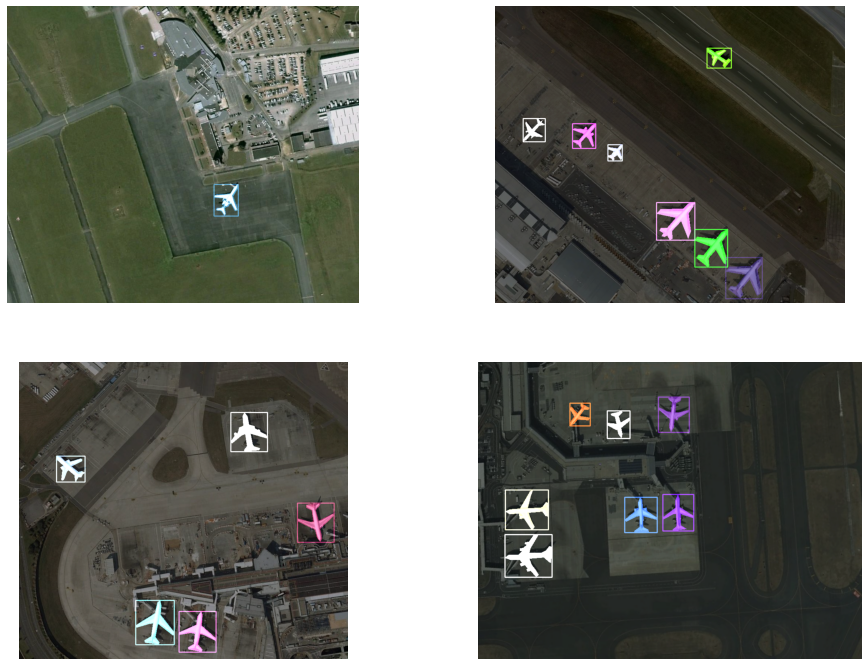

In [12]:
ds_loader = Dataset(tag)

fig = plt.figure(figsize=(8, 6))
for n,data in enumerate(ds_loader[:4]):
  image = data['image'].compute() # Convert TensorView to Numpy style
  instances = np.zeros(image.shape, dtype=np.uint8)
  h, w, _ =  image.shape

  for idx, obj in enumerate(data['objects'].compute()): # Convert ObjectView to List(Dict) 
    bbox = obj['bbox'][[1,0,3,2]] # convert [ymin,xmin,ymax,xmax] to [xmin, ymin, xmax, ymax] 
    bbox[0]*=w; bbox[1]*=h; bbox[2]*=w; bbox[3]*=h;
    c = (np.random.random((1, 3))*255).tolist()[0]
    segmentation = obj['segmentation']
    indices = np.where(segmentation>0)
    instances[indices[0], indices[1], :] = c
    cv2.rectangle(instances, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), c, 2)
    image = cv2.addWeighted(image, 0.9, instances, 0.7,0)

  a = fig.add_subplot(2, np.ceil(4/float(2)), n + 1)
  plt.axis('off')
  plt.imshow(image)

fig.set_size_inches(np.array(fig.get_size_inches()) * len(random_ids)/2)
plt.show()
  